# 09 Time Series
__Math 3080: Fundamentals of Data Science__

Reading:
* McKinney, Chapter 11 Time Series

Outline:
* Datetime objects
* Conversion from Datetime to string
* Using Datetime as index

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

## Datetime objects

### Making a timestamp

In [126]:
datetime.now()

datetime.datetime(2023, 3, 28, 18, 49, 5, 576866)

In [127]:
now = datetime.now()
print(now.year, now.month, now.day)
print(now.hour, now.minute, now.second)

2023 3 28
18 49 6


In [128]:
timestamp = datetime(2018, 5, 5)
timestamp

datetime.datetime(2018, 5, 5, 0, 0)

In [129]:
# Get just the date
datetime.now().date()

datetime.date(2023, 3, 28)

In [130]:
# Get just the time
datetime.now().time()

datetime.time(18, 49, 11, 672319)

### Timezones

In [53]:
# Timezone
import pytz # Python Timezone

#pytz.common_timezones  # This will list all the available timezones

tz = pytz.timezone('UTC')  # aka Greenwich Mean Time, or Zulu Time

datetime.now(tz)

datetime.datetime(2023, 3, 28, 21, 39, 12, 963501, tzinfo=<UTC>)

In [55]:
datetime.now(pytz.timezone('Europe/Berlin'))

datetime.datetime(2023, 3, 28, 23, 41, 8, 533065, tzinfo=<DstTzInfo 'Europe/Berlin' CEST+2:00:00 DST>)

### Changes in time

In [5]:
datetime(2023, 3, 25) - datetime(2022, 9, 12)

datetime.timedelta(days=194)

In [6]:
datetime(2023, 3, 25, 12, 0, 0) - datetime(2023, 1, 12, 16, 5, 23)

datetime.timedelta(days=71, seconds=71677)

In [7]:
delta = datetime(2023, 3, 25, 12, 0, 0) - datetime(2023, 1, 12, 16, 5, 23)

print(delta.days, delta.seconds)

71 71677


In [8]:
from datetime import timedelta
datetime.now() - timedelta(20)

datetime.datetime(2023, 3, 8, 10, 14, 41, 580518)

In [9]:
datetime.now() - 2*delta

datetime.datetime(2022, 11, 4, 18, 25, 27, 776902)

### Date Ranges

In [28]:
#pd.date_range(datetime(2012, 4, 1), datetime(2012, 6, 1)
pd.date_range("2012-04-01","2012-06-01")

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [131]:
pd.date_range( datetime.now() - timedelta(20) , datetime.now() )

DatetimeIndex(['2023-03-08 18:49:43.987683', '2023-03-09 18:49:43.987683',
               '2023-03-10 18:49:43.987683', '2023-03-11 18:49:43.987683',
               '2023-03-12 18:49:43.987683', '2023-03-13 18:49:43.987683',
               '2023-03-14 18:49:43.987683', '2023-03-15 18:49:43.987683',
               '2023-03-16 18:49:43.987683', '2023-03-17 18:49:43.987683',
               '2023-03-18 18:49:43.987683', '2023-03-19 18:49:43.987683',
               '2023-03-20 18:49:43.987683', '2023-03-21 18:49:43.987683',
               '2023-03-22 18:49:43.987683', '2023-03-23 18:49:43.987683',
               '2023-03-24 18:49:43.987683', '2023-03-25 18:49:43.987683',
               '2023-03-26 18:49:43.987683', '2023-03-27 18:49:43.987683',
               '2023-03-28 18:49:43.987683'],
              dtype='datetime64[ns]', freq='D')

In [132]:
pd.date_range( datetime.now().date() - timedelta(20) , datetime.now().date() )

DatetimeIndex(['2023-03-08', '2023-03-09', '2023-03-10', '2023-03-11',
               '2023-03-12', '2023-03-13', '2023-03-14', '2023-03-15',
               '2023-03-16', '2023-03-17', '2023-03-18', '2023-03-19',
               '2023-03-20', '2023-03-21', '2023-03-22', '2023-03-23',
               '2023-03-24', '2023-03-25', '2023-03-26', '2023-03-27',
               '2023-03-28'],
              dtype='datetime64[ns]', freq='D')

## Conversion between Datetime and string formats
When loading data, most timestamps are in a string format. We can go back and forth between datetime and string formats easily enough. To do this, we use time formatting options.
* Look at tables 11.2 and 11.3 in McKinney's Textbook for formatting codes

In [10]:
# datetime to string
str(timestamp)

'2018-05-05 00:00:00'

In [11]:
datetime.now().strftime("%w : %d %m %y")

'2 : 28 03 23'

In [12]:
weekday = {'0': "Sunday", '1': "Monday", '2': "Tuesday", '3': "Wednesday",
           '4': "Thursday", '5': "Friday", '6': "Saturday"}

months = {'01': "Jan", '02': "Feb", '03': "Mar", '04': "Apr",
          '05': "May", '06': "Jun", '07': "Jul", '08': "Aug",
          '09': "Sep", '10': "Oct", '11': "Nov", '12': "Dec"}

In [13]:
timestamp = datetime.now()

print("Today is",weekday[timestamp.strftime("%w")], ", ",
      timestamp.strftime("%d"), months[timestamp.strftime("%m")],
      timestamp.strftime("%Y"), ". Good morning.")

Today is Tuesday ,  28 Mar 2023 . Good morning.


In [14]:
# string to datetime
the_date = "May 24, 2012"

datetime.strptime(the_date, "%b %d, %Y")

datetime.datetime(2012, 5, 24, 0, 0)

When dealing with multiple dates in a series, *pandas* makes this very simple using the `pd.to_datetime` method.

In [15]:
dates = ["2022-04-02","2022-04-03","2022-04-04",
         "2022-04-05","2022-04-06","2022-04-07"]

pd.to_datetime(dates)

DatetimeIndex(['2022-04-02', '2022-04-03', '2022-04-04', '2022-04-05',
               '2022-04-06', '2022-04-07'],
              dtype='datetime64[ns]', freq='D')

## Time Series Basics
Now that we have a way to work with timestamps, we can use an array of timestamps in our data analysis.

In [16]:
timeseries = pd.Series(np.random.standard_normal(6), index=dates)
timeseries

2022-04-02    0.139492
2022-04-03    2.272823
2022-04-04   -0.093660
2022-04-05   -1.300673
2022-04-06   -1.986962
2022-04-07   -0.481844
dtype: float64

<AxesSubplot: >

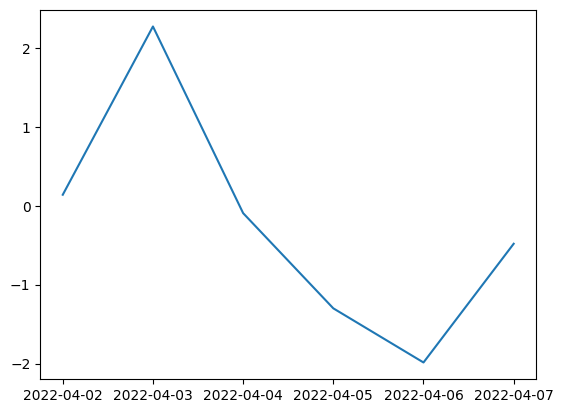

In [17]:
sns.lineplot(timeseries)

In [18]:
timeseries.index[0]

'2022-04-02'

In [19]:
timeseries["2022-04-05"]

-1.3006728821798874

In [20]:
pd.date_range("2023-01-01", periods=365)

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09', '2023-01-10',
               ...
               '2023-12-22', '2023-12-23', '2023-12-24', '2023-12-25',
               '2023-12-26', '2023-12-27', '2023-12-28', '2023-12-29',
               '2023-12-30', '2023-12-31'],
              dtype='datetime64[ns]', length=365, freq='D')

In [21]:
long_ts = pd.Series(np.random.standard_normal(1000),
                   index=pd.date_range("2000-01-01", periods=1000))
long_ts

2000-01-01    0.329990
2000-01-02    1.000144
2000-01-03   -0.782262
2000-01-04   -0.018105
2000-01-05   -0.225856
                ...   
2002-09-22   -0.332165
2002-09-23    1.111426
2002-09-24   -0.700181
2002-09-25    0.005137
2002-09-26   -0.514535
Freq: D, Length: 1000, dtype: float64

(array([10957., 11078., 11201., 11323., 11443., 11566., 11688., 11808.,
        11931.]),
 [Text(10957.0, 0, '2000-01'),
  Text(11078.0, 0, '2000-05'),
  Text(11201.0, 0, '2000-09'),
  Text(11323.0, 0, '2001-01'),
  Text(11443.0, 0, '2001-05'),
  Text(11566.0, 0, '2001-09'),
  Text(11688.0, 0, '2002-01'),
  Text(11808.0, 0, '2002-05'),
  Text(11931.0, 0, '2002-09')])

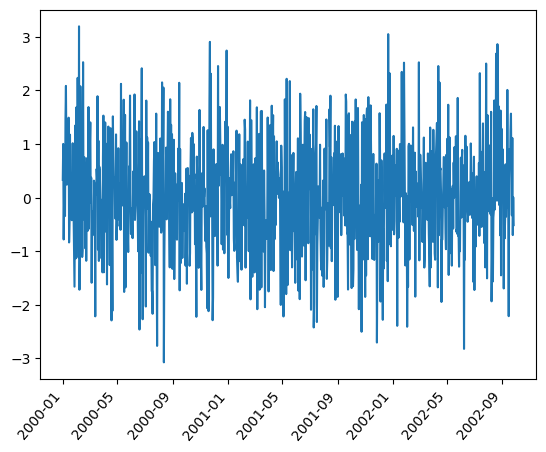

In [137]:
sns.lineplot(long_ts)
plt.xticks(rotation=50, ha='right')

<AxesSubplot: >

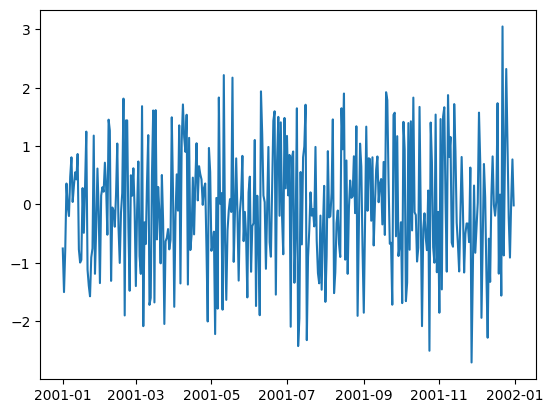

In [134]:
sns.lineplot(long_ts["2001"])

(array([11443., 11447., 11451., 11455., 11459., 11463., 11467., 11471.,
        11474.]),
 [Text(11443.0, 0, '2001-05-01'),
  Text(11447.0, 0, '2001-05-05'),
  Text(11451.0, 0, '2001-05-09'),
  Text(11455.0, 0, '2001-05-13'),
  Text(11459.0, 0, '2001-05-17'),
  Text(11463.0, 0, '2001-05-21'),
  Text(11467.0, 0, '2001-05-25'),
  Text(11471.0, 0, '2001-05-29'),
  Text(11474.0, 0, '2001-06-01')])

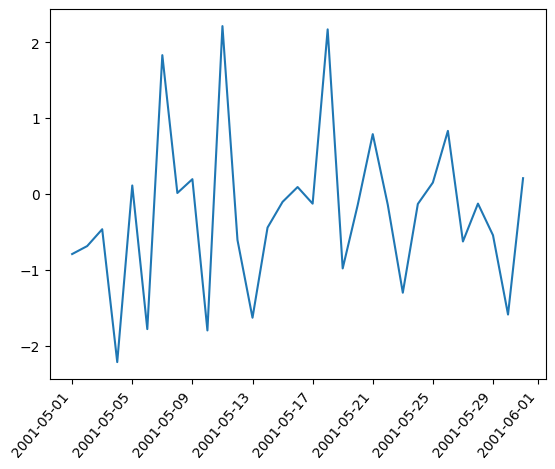

In [135]:
sns.lineplot(long_ts["2001-05"])
plt.xticks(rotation=50, ha='right')

(array([11443., 11457., 11474., 11488., 11504., 11518.]),
 [Text(11443.0, 0, '2001-05-01'),
  Text(11457.0, 0, '2001-05-15'),
  Text(11474.0, 0, '2001-06-01'),
  Text(11488.0, 0, '2001-06-15'),
  Text(11504.0, 0, '2001-07-01'),
  Text(11518.0, 0, '2001-07-15')])

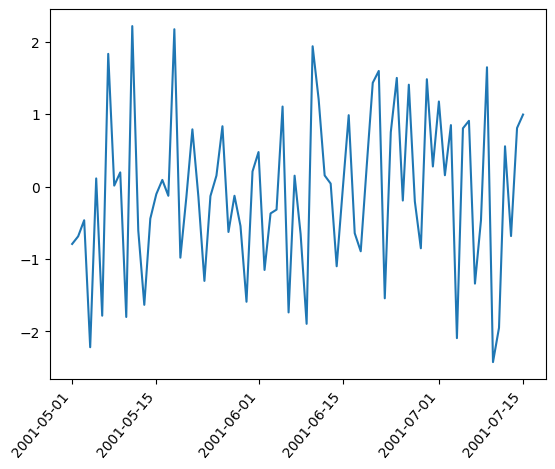

In [136]:
sns.lineplot(long_ts[datetime(2001,5,1):datetime(2001,7,15)])
plt.xticks(rotation=50, ha='right')

<AxesSubplot: >

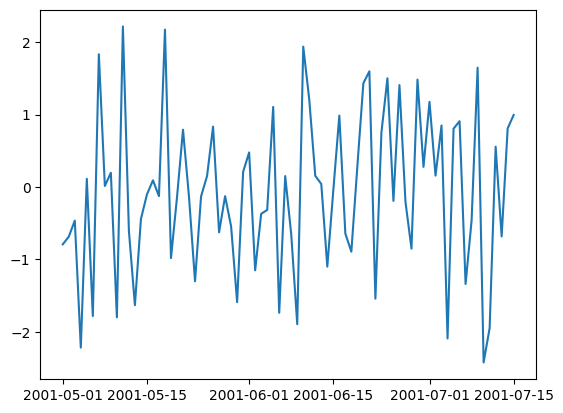

In [26]:
sns.lineplot(long_ts["2001-05-01":"2001-07-15"])
plt.xticks(rotation=50, ha='right')

In [27]:
long_ts.truncate(after="2000-12-01")

2000-01-01    0.329990
2000-01-02    1.000144
2000-01-03   -0.782262
2000-01-04   -0.018105
2000-01-05   -0.225856
                ...   
2000-11-27   -0.278887
2000-11-28   -2.288477
2000-11-29   -1.864084
2000-11-30    0.899420
2000-12-01   -0.255476
Freq: D, Length: 336, dtype: float64

## Setting Date/Time as Index

In [73]:
stocks = pd.read_csv('https://raw.githubusercontent.com/wesm/pydata-book/3rd-edition/examples/stock_px.csv')
stocks.head()

,Unnamed: 0,AAPL,MSFT,XOM,SPX
0,2003-01-02 00:00:00,7.40,21.11,29.22,909.03
1,2003-01-03 00:00:00,7.45,21.14,29.24,908.59
2,2003-01-06 00:00:00,7.45,21.52,29.96,929.01
3,2003-01-07 00:00:00,7.43,21.93,28.95,922.93
4,2003-01-08 00:00:00,7.28,21.31,28.83,909.93


In [74]:
stocks.columns = ['Date', 'AAPL', 'MSFT', 'XOM', 'SPX']
stocks['Date'] = pd.to_datetime(stocks['Date'])
stocks.head()

,Date,AAPL,MSFT,XOM,SPX
0,2003-01-02,7.40,21.11,29.22,909.03
1,2003-01-03,7.45,21.14,29.24,908.59
2,2003-01-06,7.45,21.52,29.96,929.01
3,2003-01-07,7.43,21.93,28.95,922.93
4,2003-01-08,7.28,21.31,28.83,909.93


In [76]:
stocks.set_index(stocks['Date'], inplace=True)
stocks.drop('Date', axis=1, inplace=True)
stocks.head()

,AAPL,MSFT,XOM,SPX
Date,,,,
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93


### Moving Window / Rolling Average

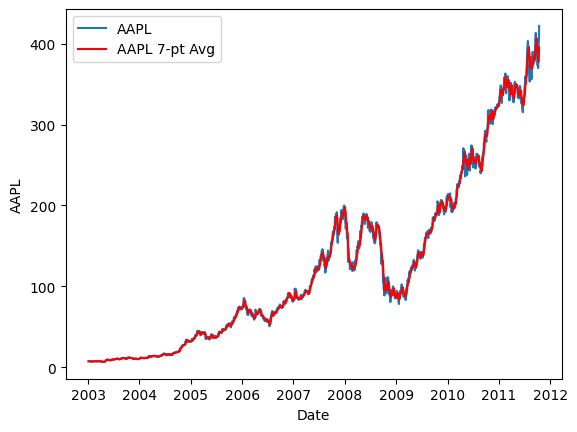

In [142]:
stocks['AAPL_7'] = stocks['AAPL'].rolling(7).mean()

import plotly.express as px

#px.line(stocks['AAPL'])
#px.line(stocks['AAPL_7'])

sns.lineplot(data=stocks, x=stocks.index, y='AAPL', label='AAPL')
sns.lineplot(data=stocks, x=stocks.index, y='AAPL_7', label='AAPL 7-pt Avg', color='red')
plt.legend()
plt.show()

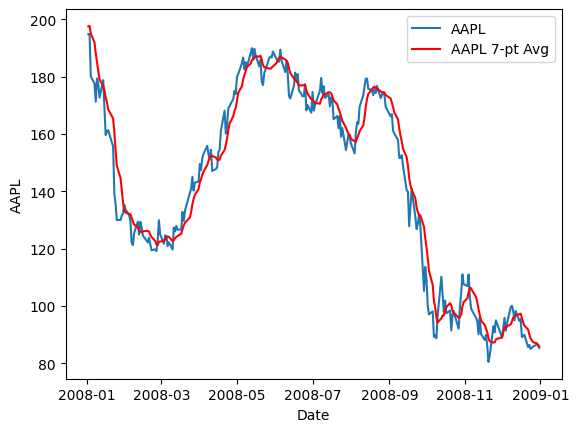

In [143]:
sns.lineplot(data=stocks["2008-01":"2008-12"], x=stocks["2008-01":"2008-12"].index, y='AAPL', label='AAPL')
sns.lineplot(data=stocks["2008-01":"2008-12"], x=stocks["2008-01":"2008-12"].index, y='AAPL_7', label='AAPL 7-pt Avg', color='red')
plt.legend()
plt.show()

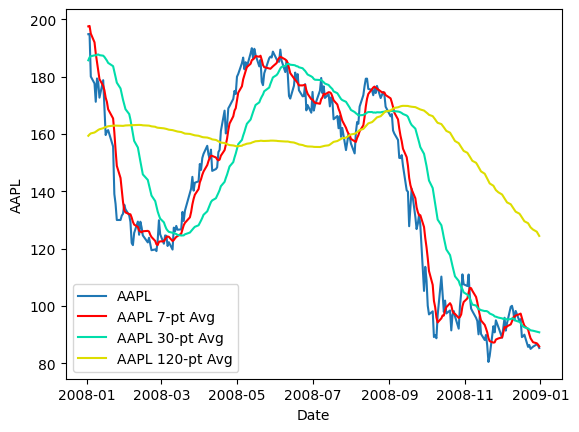

In [151]:
sns.lineplot(data=stocks["2008-01":"2008-12"], x=stocks["2008-01":"2008-12"].index, y='AAPL', label='AAPL')
sns.lineplot(data=stocks["2008-01":"2008-12"], x=stocks["2008-01":"2008-12"].index, y='AAPL_7', label='AAPL 7-pt Avg', color='red')
sns.lineplot(data=stocks["2008-01":"2008-12"], x=stocks["2008-01":"2008-12"].index, y=stocks['AAPL'].rolling(30).mean().loc["2008-01":"2008-12"], label='AAPL 30-pt Avg', color='#00ddaa')
sns.lineplot(data=stocks["2008-01":"2008-12"], x=stocks["2008-01":"2008-12"].index, y=stocks['AAPL'].rolling(120).mean().loc["2008-01":"2008-12"], label='AAPL 120-pt Avg', color='#dddd00')
plt.legend()
plt.show()

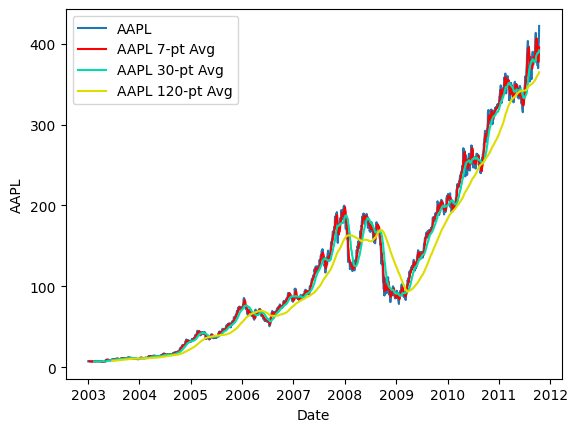

In [152]:
sns.lineplot(data=stocks, x=stocks.index, y='AAPL', label='AAPL')
sns.lineplot(data=stocks, x=stocks.index, y='AAPL_7', label='AAPL 7-pt Avg', color='red')
sns.lineplot(data=stocks, x=stocks.index, y=stocks['AAPL'].rolling(30).mean(), label='AAPL 30-pt Avg', color='#00ddaa')
sns.lineplot(data=stocks, x=stocks.index, y=stocks['AAPL'].rolling(120).mean(), label='AAPL 120-pt Avg', color='#dddd00')
plt.legend()
plt.show()

### Exponentially Weighted Functions

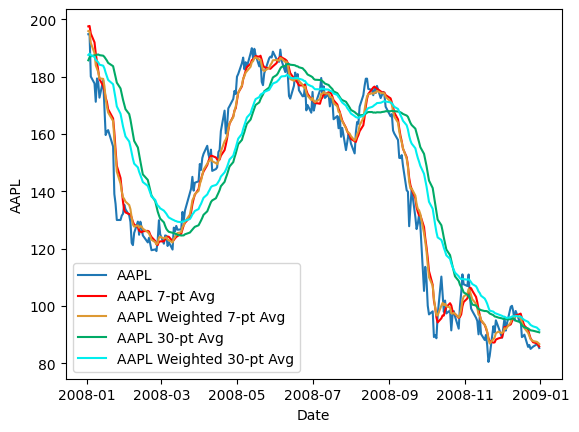

In [158]:
stocks['AAPL_ewm'] = stocks['AAPL'].ewm(span=7).mean()
stocks['AAPL_30'] = stocks['AAPL'].rolling(30).mean()
stocks['AAPL_30ewm'] = stocks['AAPL'].ewm(span=30).mean()

sns.lineplot(data=stocks["2008-01":"2008-12"], x=stocks["2008-01":"2008-12"].index, y='AAPL', label='AAPL')
sns.lineplot(data=stocks["2008-01":"2008-12"], x=stocks["2008-01":"2008-12"].index, y='AAPL_7', label='AAPL 7-pt Avg', color='red')
sns.lineplot(data=stocks["2008-01":"2008-12"], x=stocks["2008-01":"2008-12"].index, y='AAPL_ewm', label='AAPL Weighted 7-pt Avg', color='#dd9933')
sns.lineplot(data=stocks["2008-01":"2008-12"], x=stocks["2008-01":"2008-12"].index, y='AAPL_30', label='AAPL 30-pt Avg', color='#00aa66')
sns.lineplot(data=stocks["2008-01":"2008-12"], x=stocks["2008-01":"2008-12"].index, y='AAPL_30ewm', label='AAPL Weighted 30-pt Avg', color='#00eeee')

plt.legend()
plt.show()

## Comparing two stocks that are not similar

<AxesSubplot: xlabel='Date', ylabel='AAPL'>

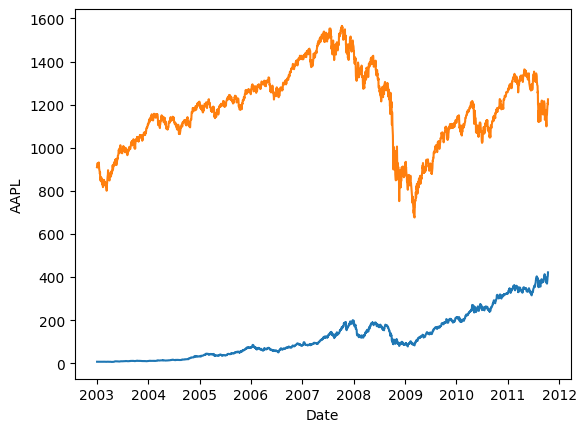

In [114]:
sns.lineplot(data=stocks, x=stocks.index, y='AAPL')
sns.lineplot(data=stocks, x=stocks.index, y='SPX')

<AxesSubplot: xlabel='Date', ylabel='AAPL_change'>

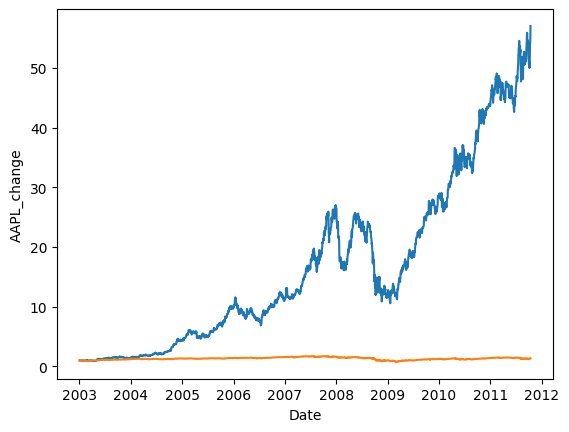

In [124]:
stocks['AAPL_change'] = stocks['AAPL']/stocks.loc["2003-01-02",'AAPL']
stocks['SPX_change'] = stocks['SPX']/stocks.loc["2003-01-02",'SPX']

sns.lineplot(data=stocks, x=stocks.index, y='AAPL_change')
sns.lineplot(data=stocks, x=stocks.index, y='SPX_change')

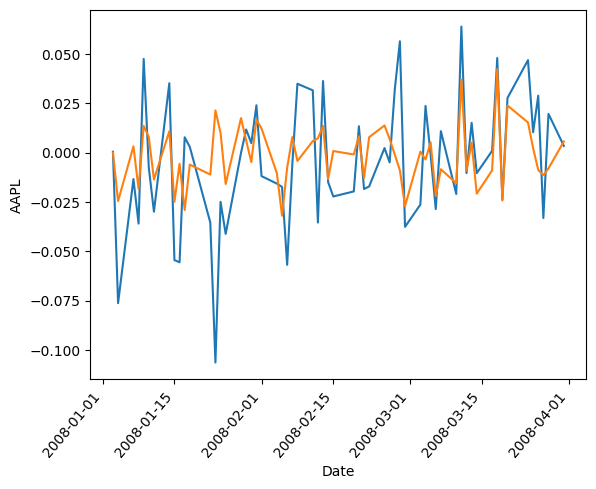

In [115]:
sns.lineplot(data=stocks["2008-01":"2008-03"], x=stocks["2008-01":"2008-03"].index, y=stocks.loc["2008-01":"2008-03",'AAPL'].pct_change())
sns.lineplot(data=stocks["2008-01":"2008-03"], x=stocks["2008-01":"2008-03"].index, y=stocks.loc["2008-01":"2008-03",'SPX'].pct_change())
plt.xticks(rotation=50, ha='right')
plt.show()

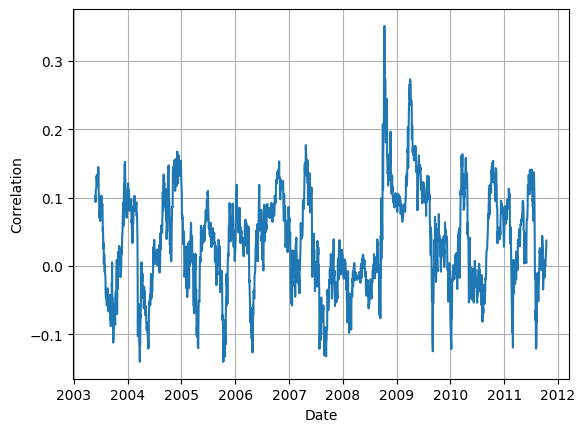

In [120]:
stocks['Correlation'] = stocks['AAPL'].rolling(125, min_periods=100).corr(stocks['SPX'].pct_change())
sns.lineplot(data=stocks, x=stocks.index, y='Correlation')
plt.grid(visible=True)

In [122]:
stocks.head()

,AAPL,MSFT,XOM,SPX,AAPL_7,AAPL_ewm,Correlation
Date,,,,,,,
2003-01-02,7.40,21.11,29.22,909.03,NaN,7.400000,NaN
2003-01-03,7.45,21.14,29.24,908.59,NaN,7.428571,NaN
2003-01-06,7.45,21.52,29.96,929.01,NaN,7.437838,NaN
2003-01-07,7.43,21.93,28.95,922.93,NaN,7.434971,NaN
2003-01-08,7.28,21.31,28.83,909.93,NaN,7.384174,NaN


Things to discuss:
* Setting date/time as index
* Moving Windows
  * 7-point averages
  * Exponentially-weighted means